In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

%matplotlib inline
from ipywidgets import interactive

import ipywidgets as widgets

import blastula_class as blc

In [2]:
def calc_l_ext(Re, R, angle, d) :
    return np.cos(angle)*d + np.sqrt(R**2 - d**2 * np.sin(angle)**2)

def calc_l_in(Re, R, angle, d) :
    return np.cos(angle)*d - np.sqrt(R**2 - d**2 * np.sin(angle)**2)

def calc_psi_ext(Re, R, angle, d) :
    l = calc_l_ext(Re, R, angle, d)
    return np.arcsin( l *np.sin(angle)/R )

def calc_psi_in(Re, R, angle, d) :
    l = calc_l_in(Re, R, angle, d)
    return np.arcsin( l *np.sin(angle)/R )

c_list = ['#780096','#FF36B8','#FF0700','#62FFFF','#009BFF','#0000FF','#D9E34C','#63DB00','#00B400']

# Single blastomere

Test done


([0.613227606476582, 0.44553593545217257, 1.4298240706052323],
 [0.11415970589496087, 0.08294188131727337, 0.3381766057449424],
 0.5266905181942677)

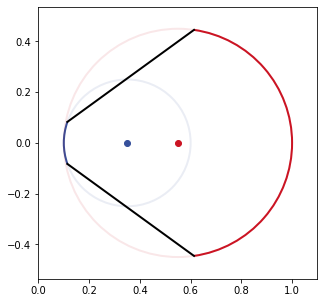

In [3]:
R_embryo, Nb = 1., 5
theta_e = pi/Nb
d = 0.2
Ra = .45
Rb = .25

b = blc.Blastomere(Ra, Rb, d, theta_e, R_embryo)
b.calc_blastomere()

b.plot_blastomere(circles=True, center=True, savefig=False)


# Blastula

Total embryo area =  78.53981633974483
Total blastomere area =  29.469387779138472
Single blastomere area =  1.4734693889569237
Cavity volume =  44.27197920997593


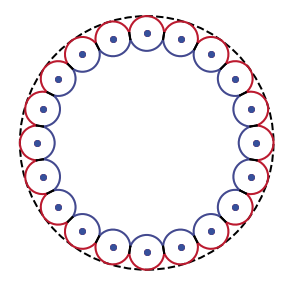

In [4]:
R_embryo, Nb = 5., 20
theta_e = pi/Nb
d=-0.0
Ra = R_embryo*np.sin(theta_e)/(1.+np.sin(theta_e))+0.01
Rb = (R_embryo-(Ra+d))*np.sin(theta_e)+0.01

e = blc.Embryo(R_embryo=R_embryo, Nb=Nb)
#print(Ra, Rb)
e.plot_embryo(d=d, Ra=Ra, Rb=Rb, centers=True, circles=True, print_areas=True)



# Interactive blastula

In [6]:
def plot_interactive_RaRbNbdRe(Ra, Rb, Nb, d, Re): 
    
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    fig = e.plot_embryo(d=d, Ra=Ra, Rb=Rb, centers=False, circles=False, print_areas=0)
    #print(e.Nb, e.cell_area, Ra, Rb, d)
    #s = str(e.Nb) + '\t' + str(e.cell_area) + '\t' + str(Ra) + '\t' + str(Rb) + '\t' + str(d) + '\n'
    psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)
    H = Ra+Rb+d
    L = 2*Ra*np.sin(psi_a)
    r = L/H
    
    print('=====================')
    print('Aspect ratio = ', "{:2.4f}".format(r))
    print('Height H = ', "{:2.4f}".format(H))
    print('Cavity area ratio = ', "{:2.3f}".format(e.cavity_area/e.total_area*100), '%')
    print('Lateral contact length = ', "{:2.3f}".format(np.abs(e.la-e.lb)))
    print()


interactive_plot = interactive(plot_interactive_RaRbNbdRe, Nb=(0, 30), d=(-3.00, 3.), Ra=(0., 1.), Rb=(0., 1.), Re=(0., 5.))
output = interactive_plot.children[-1]
output.layout.height = '500px'
#f.write(interactive_plot.children[-1].outputs[-1]['text'], 'a')

interactive_plot

#interactive_plot.children[-1].outputs[-1]['text']



interactive(children=(FloatSlider(value=0.5, description='Ra', max=1.0), FloatSlider(value=0.5, description='R…

# Illustrative cases

Total embryo area =  3.141592653589793
Total blastomere area =  2.0799032367186037
Single blastomere area =  0.3466505394531006
Cavity volume =  0.7899311957529502


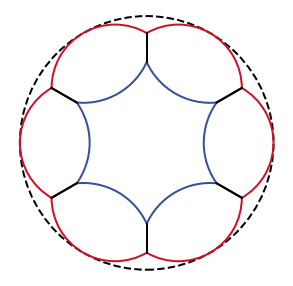

Aspect ratio =  1.5746
Height H =  0.5500

Total embryo area =  2.5446900494077327
Total blastomere area =  2.0714945612378806
Single blastomere area =  0.20714945612378804
Cavity volume =  0.40749147508998135


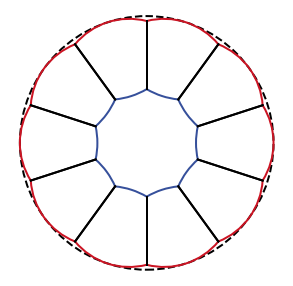

Aspect ratio =  0.9719
Height H =  0.5500

Total embryo area =  2.4884555409084754
Total blastomere area =  2.082723949270834
Single blastomere area =  0.14876599637648816
Cavity volume =  0.3734664760930355


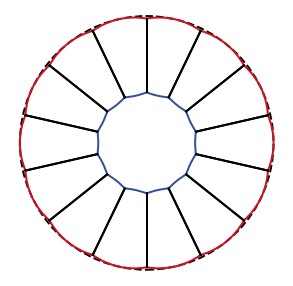

Aspect ratio =  0.7061
Height H =  0.5500

Total embryo area =  4.523893421169302
Total blastomere area =  2.081052880254825
Single blastomere area =  0.2081052880254825
Cavity volume =  2.264355284999234


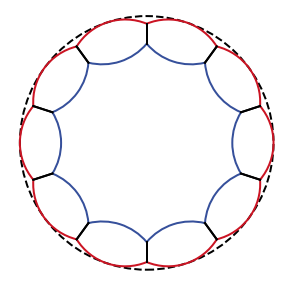

Aspect ratio =  1.7871
Height H =  0.3900

Total embryo area =  2.269800692218625
Total blastomere area =  2.0906486223800456
Single blastomere area =  0.20906486223800455
Cavity volume =  0.0742523542403182


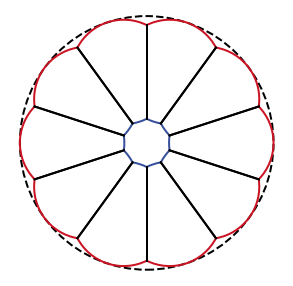

Aspect ratio =  0.6971
Height H =  0.7000



In [7]:
savefig = False

cases = [(1.0, 6, 0.5, 0.55, -0.5), 
         (0.90, 10, 0.5, 0.55, -0.5),
         (0.89, 14, 0.5, 0.55, -0.5),
         (1.20, 10, 0.54, 0.55, -0.70),
         (0.85, 10, 0.35, 0.35, 0.)]
# cases[i] = (Re, Nb, Ra, Rb, d)

for i in range(len(cases)) :
    savename = 'pic'+str(i)+'.eps'
    Re, Nb, Ra, Rb, d = cases[i]
    
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra, Rb=Rb, print_areas=True, savefig=savefig, savename=savename)
    psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)
    H = Ra+Rb+d
    L = 2*Ra*np.sin(psi_a)
    r = L/H
    
    print('=====================')
    print('Aspect ratio = ', "{:2.4f}".format(r))
    print('Height H = ', "{:2.4f}".format(H))
    print('===============================================================')
    print('===============================================================')
    print()


# Aspect ratio

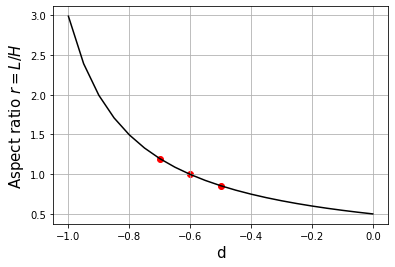

Total embryo area =  3.141592653589793
Total blastomere area =  2.2357341575379324
Single blastomere area =  0.22357341575379325
Cavity volume =  0.8381892361174428


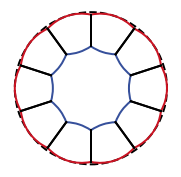

r = 1.19596050151486
H =  0.5
Total embryo area =  3.141592653589793
Total blastomere area =  2.541056710048062
Single blastomere area =  0.2541056710048062
Cavity volume =  0.5328666836073139


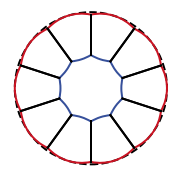

r = 0.9966337512623834
H =  0.6
Total embryo area =  3.141592653589793
Total blastomere area =  2.7761114735591805
Single blastomere area =  0.2776111473559181
Cavity volume =  0.2978119200961936


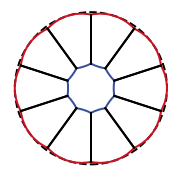

r = 0.8542575010820429
H =  0.7


In [8]:
savefig=False

Re = 1.
Nb = 10

Ra, Rb = .6, .6
d = np.linspace(-1., 0., 21)

psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H
plt.plot(d, r, color='k')
index_list = [6, 8, 10]
for i in index_list :
    plt.scatter(d[i], r[i], color='r')
    
plt.xlabel('d', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)
plt.grid()

if savefig :
    plt.savefig('aspectratio_VS_d.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d[i], Ra=Ra, Rb=Rb, savefig=savefig, savename='pic_d'+"{:2.2f}".format(d[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3), print_areas=True)
    print('r =', r[i])
    print('H = ', H[i])
    print('========================================')
    print('========================================')
    

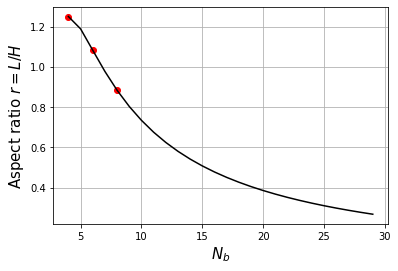

Total embryo area =  3.141592653589793
Total blastomere area =  2.374297435588181
Cavity volume =  0.04912472280167886
Left space =  0.7181704951999333


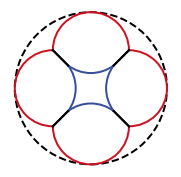

r= 1.25
Total embryo area =  3.141592653589793
Total blastomere area =  2.7243251554241104
Cavity volume =  0.02425154617457403
Left space =  0.3930159519911087


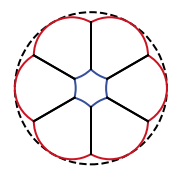

r= 1.082531754730548
Total embryo area =  3.141592653589793
Total blastomere area =  2.849246459261881
Cavity volume =  0.016970428738263748
Left space =  0.2753757655896485


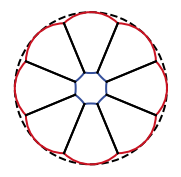

r= 0.8838834764831844


In [41]:
savefig = False

Re = 1.

d=-0.2
Ra, Rb = 0.5, 0.5

Nb_list = np.arange(4, 30)

psi_a = np.array([calc_psi_ext(Re, Ra, angle=pi/Nb_list[i], d=Re-Ra) for i in range(len(Nb_list))])

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H

plt.plot(Nb_list, r, color='k')

index_list = [0, 2, 4]
for i in index_list :
    plt.scatter(Nb_list[i], r[i], color='r')

plt.xlabel(r'$N_b$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Nb.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb_list[i])
    e.plot_embryo(d=d, Ra=Ra, Rb=Rb, savefig=savefig, savename='pic_Nb'+"{:2.2f}".format(Nb_list[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3), print_areas=True)
    print('r=', r[i])
    

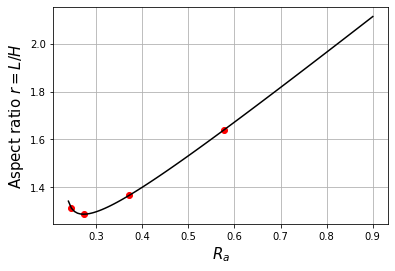

Total embryo area =  3.141592653589793
Total blastomere area =  2.3798122115098845
Cavity volume =  0.041959717494531965
Left space =  0.7198207245853765


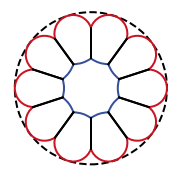

Total embryo area =  3.141592653589793
Total blastomere area =  2.497971809481414
Cavity volume =  0.035827518024376545
Left space =  0.6077933260840025


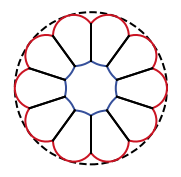

Total embryo area =  3.141592653589793
Total blastomere area =  2.7966980693150227
Cavity volume =  0.017247782805414516
Left space =  0.3276468014693559


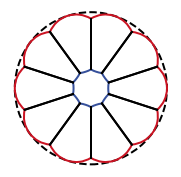

Total embryo area =  3.141592653589793
Total blastomere area =  3.0653205094398173
Cavity volume =  0.0001782810202990847
Left space =  0.07609386312967681


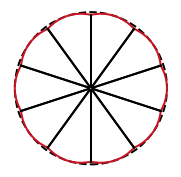

In [30]:
savefig = False

Re = 1.

Nb = 10

Rb = .4
d = 0.

Ra = np.linspace(0.24, .9, 101)
psi_a = np.array([calc_psi_ext(Re, Ra[i], angle=pi/Nb, d=Re-Ra[i]) for i in range(len(Ra))])

Lh = Ra+Rb+d
Lv = 2*Ra*np.sin(psi_a)
r = Lh/Lv

plt.plot(Ra, Lh/Lv, color='k')
index_list = [1, 5, 20, 51]
for i in index_list :
    plt.scatter(Ra[i], r[i], color='r')

plt.xlabel(r'$R_a$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Ra.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra[i], Rb=Rb, print_areas=True, savefig=savefig, savename='pic_Ra'+"{:2.2f}".format(Ra[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3))



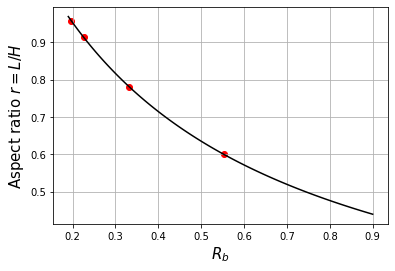

Total embryo area =  3.141592653589793
Total blastomere area =  2.4086598596617135
Cavity volume =  0.05803158443638375
Left space =  0.6749012094916957


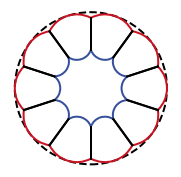

Total embryo area =  3.141592653589793
Total blastomere area =  2.500038568203691
Cavity volume =  0.04889371358218588
Left space =  0.5926603718039161


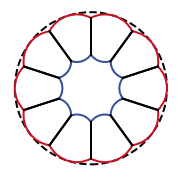

Total embryo area =  3.141592653589793
Total blastomere area =  2.748423572450532
Cavity volume =  0.024055213157501837
Left space =  0.36911386798175894


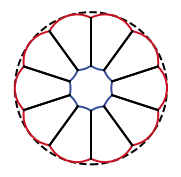

Total embryo area =  3.141592653589793
Total blastomere area =  2.981497792211754
Cavity volume =  0.0007477911813796975
Left space =  0.1593470701966595


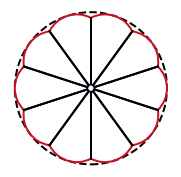

In [29]:
savefig = False

Re = 1.

Nb = 10

Ra = .4
d = 0.

Rb = np.linspace(0.19, .9, 101)
psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H

plt.plot(Rb, r, color='k')
index_list = [1, 5, 20, 51]
for i in index_list :
    plt.scatter(Rb[i], r[i], color='r')

plt.xlabel(r'$R_b$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Rb.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra, Rb=Rb[i], print_areas=True, savefig=savefig, savename='pic_Rb'+"{:2.2f}".format(Rb[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3))




[0.65  0.645 0.64  0.635 0.63  0.625 0.62  0.615 0.61  0.605 0.6   0.595
 0.59  0.585 0.58  0.575 0.57  0.565 0.56  0.555 0.55  0.545 0.54  0.535
 0.53  0.525 0.52  0.515 0.51  0.505 0.5   0.495 0.49  0.485 0.48  0.475
 0.47  0.465 0.46  0.455 0.45  0.445 0.44  0.435 0.43  0.425 0.42  0.415
 0.41  0.405 0.4   0.395 0.39  0.385 0.38  0.375 0.37  0.365 0.36  0.355
 0.35  0.345 0.34  0.335 0.33  0.325 0.32  0.315 0.31  0.305 0.3   0.295
 0.29  0.285 0.28  0.275 0.27  0.265 0.26  0.255 0.25  0.245 0.24  0.235
 0.23  0.225 0.22  0.215 0.21  0.205 0.2   0.195 0.19  0.185 0.18  0.175
 0.17  0.165 0.16  0.155 0.15 ]


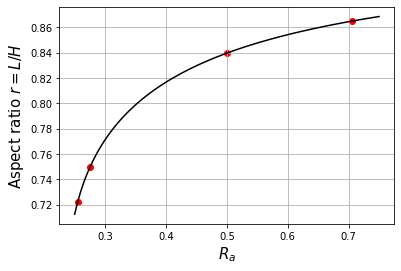

Total embryo area =  3.141592653589793
Total blastomere area =  2.5228496922090624
Cavity volume =  0.029741840337574647
Left space =  0.589001121043156


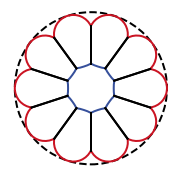

Cell area =  2.5228496922090624
Cavity area =  0.029741840337574647
Total embryo area =  3.141592653589793
Total blastomere area =  2.5621391838171634
Cavity volume =  0.0297585924918731
Left space =  0.5496948772807566


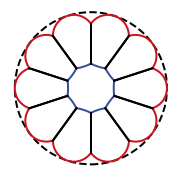

Cell area =  2.5621391838171634
Cavity area =  0.0297585924918731
Total embryo area =  3.141592653589793
Total blastomere area =  2.739528185614415
Cavity volume =  0.030073127191166397
Left space =  0.3719913407842119


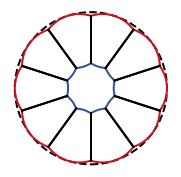

Cell area =  2.739528185614415
Cavity area =  0.030073127191166397
Total embryo area =  3.141592653589793
Total blastomere area =  2.7873036246514786
Cavity volume =  0.031167186101263074
Left space =  0.32312184283705125


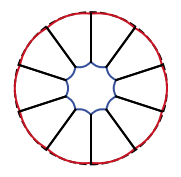

Cell area =  2.7873036246514786
Cavity area =  0.031167186101263074


In [28]:
savefig = False

Re = 1.

Nb = 10

d = -0.2
Ra_init = 0.25
Ra_end = 0.75 

length = .7

Ra = np.linspace(Ra_init, Ra_end, 101)
Rb = length - Ra - d
print(Rb)
psi_a = np.array([calc_psi_ext(Re, Ra[i], angle=pi/Nb, d=Re-Ra[i]) for i in range(len(Ra))])

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H

plt.plot(Ra, r, color='k')
index_list = [1, 5, 50, 91]
for i in index_list :
    plt.scatter(Ra[i], r[i], color='r')

plt.xlabel(r'$R_a$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Ra.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra[i], Rb=Rb[i], print_areas=True, savefig=savefig, savename='pic_Ra'+"{:2.2f}".format(Ra[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3))
    print('Cell area = ', e.cell_area)
    print('Cavity area = ', e.cavity_area)
    print('================================')



# Area VS NB

Total embryo area =  3.141592653589793
Total blastomere area =  3.09884530352952
Cavity volume =  0.0015857416407927065
Left space =  0.041161608419480356


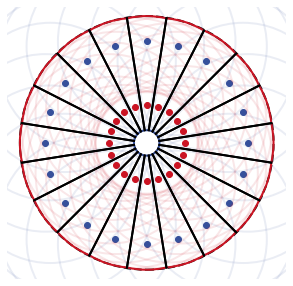

In [84]:
R_embryo, Nb = 1., 20
d=-0.5
Ra, Rb = 0.7, 0.7

e = blc.Embryo(R_embryo=R_embryo, Nb=Nb)
#print(Ra, Rb)
e.plot_embryo(d=d, Ra=Ra, Rb=Rb, centers=True, circles=True, print_areas=True)


Total embryo area =  3.141592653589793
Total blastomere area =  2.374297435588181
Cavity volume =  0.04912472280167886
Left space =  0.7181704951999333


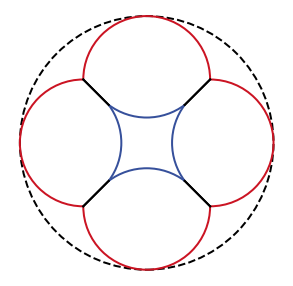

Total embryo area =  3.141592653589793
Total blastomere area =  2.6017445601241027
Cavity volume =  0.03157448240794711
Left space =  0.5082736110577435


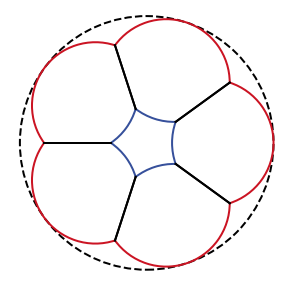

Total embryo area =  3.141592653589793
Total blastomere area =  2.7243251554241104
Cavity volume =  0.02425154617457403
Left space =  0.3930159519911087


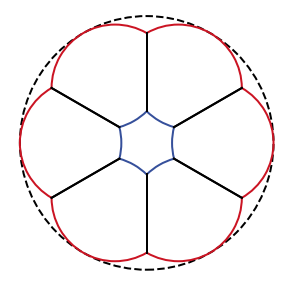

Total embryo area =  3.141592653589793
Total blastomere area =  2.7996403942483346
Cavity volume =  0.01990871812365912
Left space =  0.3220435412177993


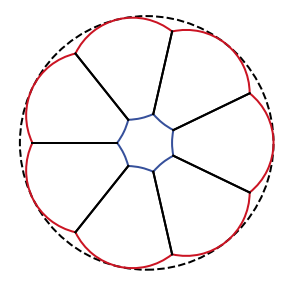

Total embryo area =  3.141592653589793
Total blastomere area =  2.849246459261881
Cavity volume =  0.016970428738263748
Left space =  0.2753757655896485


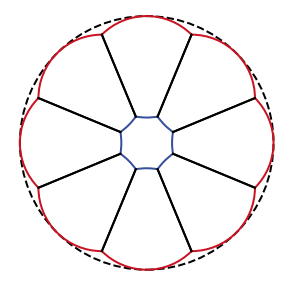

Total embryo area =  3.141592653589793
Total blastomere area =  2.8836190652402247
Cavity volume =  0.014827709261042913
Left space =  0.2431458790885257


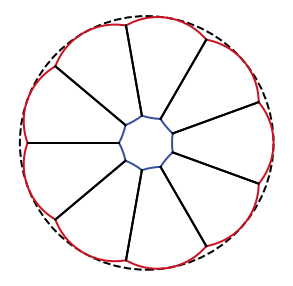

Total embryo area =  3.141592653589793
Total blastomere area =  2.9083963813703506
Cavity volume =  0.013186307615572834
Left space =  0.2200099646038698


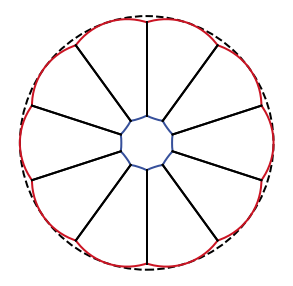

Total embryo area =  3.141592653589793
Total blastomere area =  2.9268345747200115
Cavity volume =  0.011884000007070763
Left space =  0.20287407886271103


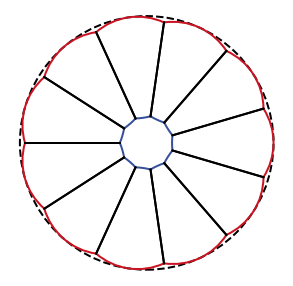

Total embryo area =  3.141592653589793
Total blastomere area =  2.9409198891293498
Cavity volume =  0.010823036472128967
Left space =  0.18984972798831423


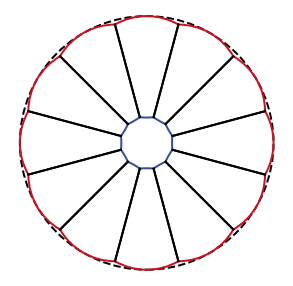

Total embryo area =  3.141592653589793
Total blastomere area =  2.9519189486721054
Cavity volume =  0.00994059132807989
Left space =  0.17973311358960808


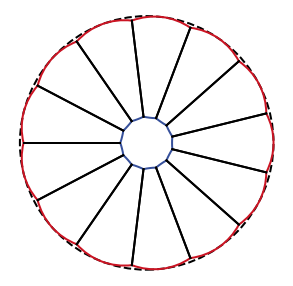

Total embryo area =  3.141592653589793
Total blastomere area =  2.960669908718448
Cavity volume =  0.009194250356278869
Left space =  0.17172849451506655


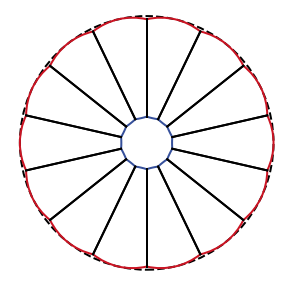

Total embryo area =  3.141592653589793
Total blastomere area =  2.967745052045436
Cavity volume =  0.00855424575224744
Left space =  0.1652933557921097


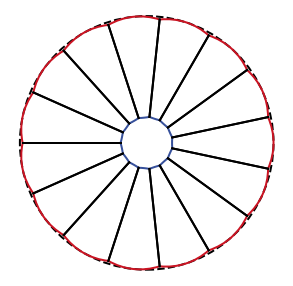

Total embryo area =  3.141592653589793
Total blastomere area =  2.9735457858229237
Cavity volume =  0.0079990169020208
Left space =  0.1600478508648484


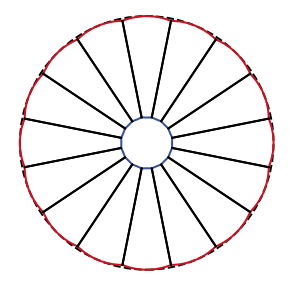

Total embryo area =  3.141592653589793
Total blastomere area =  2.9783603207030063
Cavity volume =  0.007512534552193513
Left space =  0.15571979833459348


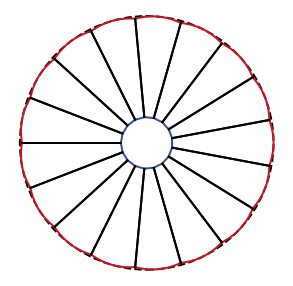

Total embryo area =  3.141592653589793
Total blastomere area =  2.9823998758597554
Cavity volume =  0.007082616438925007
Left space =  0.15211016129111288


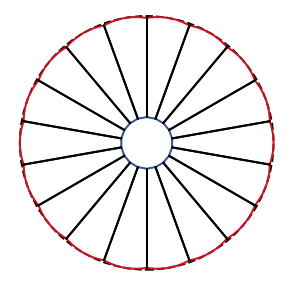

Total embryo area =  3.141592653589793
Total blastomere area =  2.9858220749633864
Cavity volume =  0.006699827923881926
Left space =  0.14907075070252462


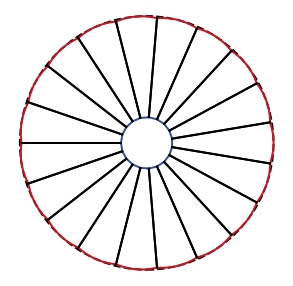

Total embryo area =  3.141592653589793
Total blastomere area =  2.9887464573463047
Cavity volume =  0.006356742066166556
Left space =  0.14648945417732184


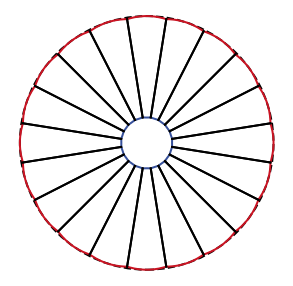

Total embryo area =  3.141592653589793
Total blastomere area =  2.9912649986158137
Cavity volume =  0.00604742827792053
Left space =  0.144280226696059


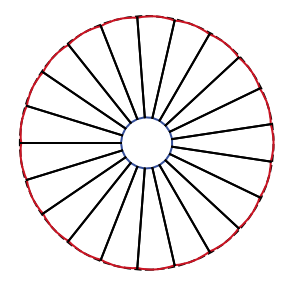

Total embryo area =  3.141592653589793
Total blastomere area =  2.993449393315926
Cavity volume =  0.005767090732128906
Left space =  0.14237616954173804


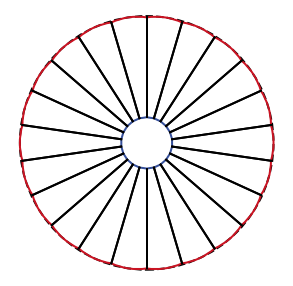

Total embryo area =  3.141592653589793
Total blastomere area =  2.9953561895417335
Cavity volume =  0.005511807452437113
Left space =  0.1407246565956224


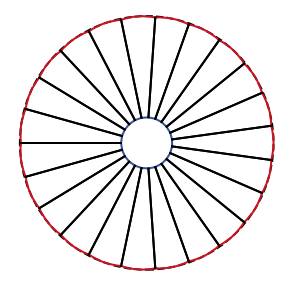

Total embryo area =  3.141592653589793
Total blastomere area =  2.9970304696925267
Cavity volume =  0.005278338654895587
Left space =  0.13928384524237059


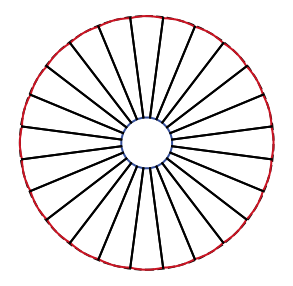

Total embryo area =  3.141592653589793
Total blastomere area =  2.998508529162613
Cavity volume =  0.005063983696505068
Left space =  0.13802014073067514


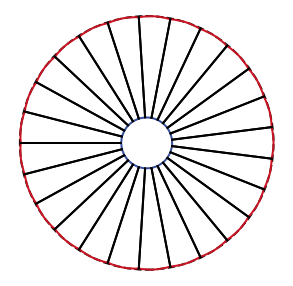

Total embryo area =  3.141592653589793
Total blastomere area =  2.999819852840707
Cavity volume =  0.0048664727624352965
Left space =  0.13690632798665092


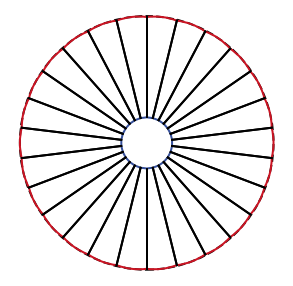

Total embryo area =  3.141592653589793
Total blastomere area =  3.000988592044043
Cavity volume =  0.004683883787493567
Left space =  0.1359201777582566


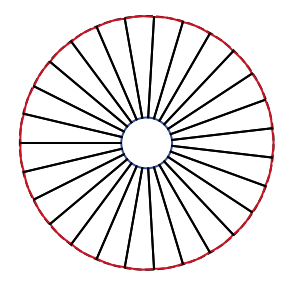

Total embryo area =  3.141592653589793
Total blastomere area =  3.0020346810671255
Cavity volume =  0.004514577979356197
Left space =  0.13504339454331138


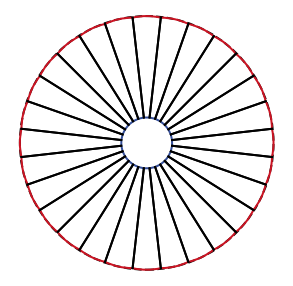

Total embryo area =  3.141592653589793
Total blastomere area =  3.0029746903969836
Cavity volume =  0.0043571492388909385
Left space =  0.13426081395391876


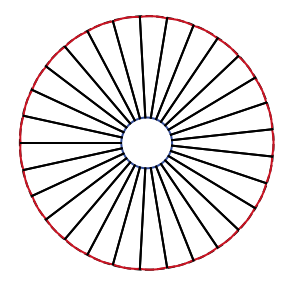

Total embryo area =  3.141592653589793
Total blastomere area =  3.0038224852183273
Cavity volume =  0.004210384090325573
Left space =  0.13355978428114046


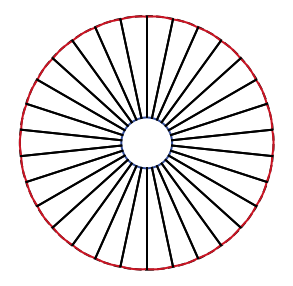

In [117]:

R_embryo, Nb = 1., 20
d=-0.2
Ra, Rb = 0.5, 0.5

filename = 'cavity_areas_d'+str(d)+'.txt'
f = open(filename, 'w')
f.write('Nb\tA_cell\tA_cav\tRa\tRb\td\n')

Nb_list = np.arange(4, 31)
for n in Nb_list :
    e = blc.Embryo(R_embryo=R_embryo, Nb=n)
    e.plot_embryo(d=d, Ra=Ra, Rb=Rb, centers=False, circles=False, print_areas=True)
    s = str(e.Nb) + '\t' + str(e.cell_area) + '\t' + str(e.cavity_area) + '\t' + str(Ra) + '\t' + str(Rb) + '\t' + str(d) + '\n'
    f.write(s)

f.close()


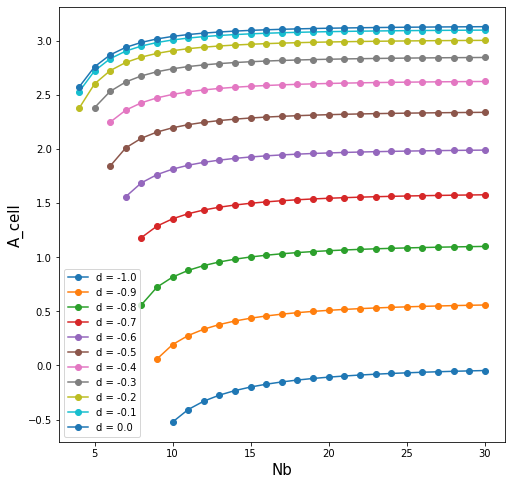

In [124]:
plt.figure(figsize=(8,8))

for d in np.arange(-10, 1)/10. :
    dat = np.loadtxt('cavity_areas_d'+str(d)+'.txt', skiprows=1, usecols=(0,1,2))
    plt.plot(dat[:, 0], dat[:, 1], marker='o', label = 'd = '+str(d))

plt.legend()

#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Nb', fontsize=15)
plt.ylabel('A_cell', fontsize=15)
plt.show()

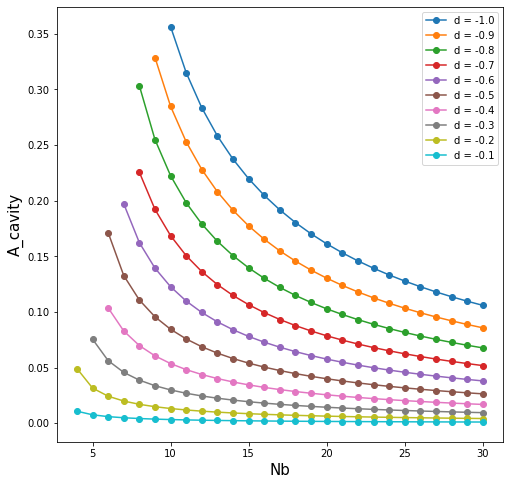

In [123]:
plt.figure(figsize=(8,8))

for d in np.arange(-10, 0)/10. :
    dat = np.loadtxt('cavity_areas_d'+str(d)+'.txt', skiprows=1, usecols=(0,1,2))
    plt.plot(dat[:, 0], dat[:, 2], marker='o', label = 'd = '+str(d))

plt.legend()

#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Nb', fontsize=15)
plt.ylabel('A_cavity', fontsize=15)
plt.show()